# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains information about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

Going to explore the dataset of the No-show appointments. The columns are as follows:

- PatientId, can be used to detect if there are multiple appointments for the same patient.
- AppointmentID, probably not useful
- Gender, can be used for grouping
- ScheduledDay, can be used to calculate difference between scheduled and appointment day
- AppointmentDay, can be used to calculate difference between scheduled and appointment day
- Age, can be used to group patients
- Neighbourhood, location of the hospital, will use but not sure if it will be relevant, because it is not clear if the patients are from the same neighbourhood
- Scholarship, indicates whether or not the patient is enrolled in Brasilian welfare program can be used to group patients
- Hypertension, diagnoses of the patient, can be used to group patients, not sure though if the diagnoses is known before the appointment.
- Diabetes, diagnoses of the patient, can be used to group patients, not sure though if the diagnoses is known before the appointment.
- Alcoholism, diagnoses of the patient, can be used to group patients, not sure though if the diagnoses is known before the appointment.
- Handcap, diagnoses of the patient, can be used to group patients, not sure though if the diagnoses is known before the appointment.
- SMS_received, can be used to group patients and see if it has an effect on the no-show
- No-show, the target variable. Will be used to group patients and see if the other columns have an effect on the no-show

Majority of the columns seem to be significant to have a possible effect on the No-show of the patients.
From the documentation: ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program. ‘ScheduledDay’ tells us on what day the patient set up their appointment.

The dependent variable is the No-show column. The independent variables are the other columns.

### Question(s) for Analysis

Questions to explore:
- What is the percentage of patients who did not show up for their appointment?
- Does the time between the scheduled day and the appointment day have an effect on the no-show?
- What abut time difference if the same day appointments are excluded?
- Gender and no-show: Is there a significant difference in the no-show rate between males and females?
- Does the scholarship have an effect on the no-show?
- Does the SMS_received have an effect on the no-show?
- Do the diagnoses have any effect on the no-show?
- Does the gender and age combination make a differenve on the no-show?
- Does the weekday of the appointment have an effect on the no-show?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df_apptm = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_apptm.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
df_apptm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in the dataset. ScheduledDay and AppointmentDay are in string format. Going to convert them to datetime format during the cleaning.

Going to check for duplicate rows.


In [33]:
df_apptm.duplicated().sum()

0

In [34]:
df_apptm.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Age column has a minimum value of -1, which is not possible and needs to be removed. The Handcap column has values greater than 1, which is not possible and needs to be removed.
Also rename the Hipertension column to Hypertension.


### Data Cleaning

Rename Hipertension to Hypertension

In [35]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df_apptm = df_apptm.rename(columns={'Hipertension': 'Hypertension'})

df_apptm.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Remove all rows where Age is less than 0 and Handcap is greater than 1.

In [36]:
df_apptm = df_apptm[df_apptm['Age'] >= 0]
df_apptm = df_apptm[df_apptm['Handcap'] <= 1]

df_apptm.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Changing the ScheduledDay and AppointmentDay columns to datetime objects.

In [37]:
df_apptm['ScheduledDay'] = pd.to_datetime(df_apptm['ScheduledDay'])
df_apptm['AppointmentDay'] = pd.to_datetime(df_apptm['AppointmentDay'])

df_apptm.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Get diff in days between ScheduledDay and AppointmentDay.
Scheduling time includes time as well, but appointment does not.
It doesn't make sense to include time of the same day in the calculation because we might get negative values. And it's not very likely that the time of the day of the scheduling would affect the patient's decision to show up.

In [38]:
df_apptm['diff_days'] = df_apptm['AppointmentDay'].dt.date - df_apptm['ScheduledDay'].dt.date
df_apptm['diff_days'] = df_apptm['diff_days'].dt.days
df_apptm.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,diff_days
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,10.186971
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,15.257836
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


There are negative values in the diff column, which is not possible. Going to remove those rows.

In [39]:
df_apptm = df_apptm[df_apptm['diff_days'] >= 0]
df_apptm.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,diff_days
count,1.103220e+05,1.103220e+05,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,1.475217e+14,5.675297e+06,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,10.187524
std,2.561305e+14,7.130031e+04,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,15.257955
min,3.921784e+04,5.030230e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174515e+12,5.640275e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725513e+06,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


Making it simpler to understand the No-show column by adding a new column called show that is True if the patient showed up and False if they didn't

In [40]:
df_apptm['show'] = df_apptm['No-show'].apply(lambda x: True if x == 'No' else False)
df_apptm[['No-show', 'show']].head()

,No-show,show
0,No,True
1,No,True
2,No,True
3,No,True
4,No,True


Set weekday for the appointment day.

In [41]:
df_apptm['appointment_weekday'] = df_apptm['AppointmentDay'].dt.day_name()

<a id='eda'></a>
## Exploratory Data Analysis

### What is the percentage of patients who did not show up for their appointment?

Calculate and then plot the percentage of patients who did not show up for their appointment using the piechart.

In [42]:
total_count = df_apptm['show'].count()

df_no_show = df_apptm.query('show == False')
df_show = df_apptm[df_apptm['show']]

count_no_show = df_no_show['show'].count()
count_show_up = df_show['show'].count()
total_count == count_no_show + count_show_up

True

Percentage of no show 20.2%


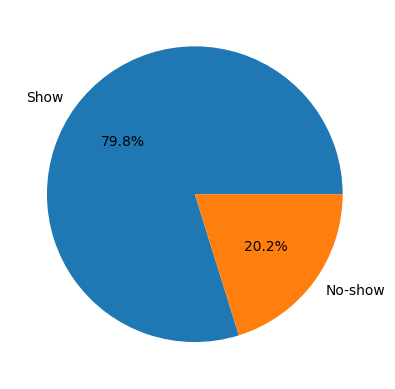

In [43]:
percentage_no_show = count_no_show / total_count * 100
# print formatted percentage using string literal
print(f'Percentage of no show {percentage_no_show:.1f}%')
fig, ax = plt.subplots()
ax.pie([count_show_up, count_no_show], labels=['Show', 'No-show'], autopct='%1.1f%%')
plt.show()

It is clear that the percentage of patients who did not show up for their appointment is 20%.
This is a significant amount and reducing this number can save time and resources for the hospital.

### Does the time between the scheduled day and the appointment day have an effect on the no-show?

Lets see the distribution of the waiting time in days

In [44]:
df_show['diff_days'].describe()

count    88049.000000
mean         8.758986
std         14.556123
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: diff_days, dtype: float64

In [45]:
df_no_show['diff_days'].describe()

count    22273.000000
mean        15.834778
std         16.600478
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: diff_days, dtype: float64

Let's see the distribution of the waiting time in days for the patients who showed up and who did not show up.

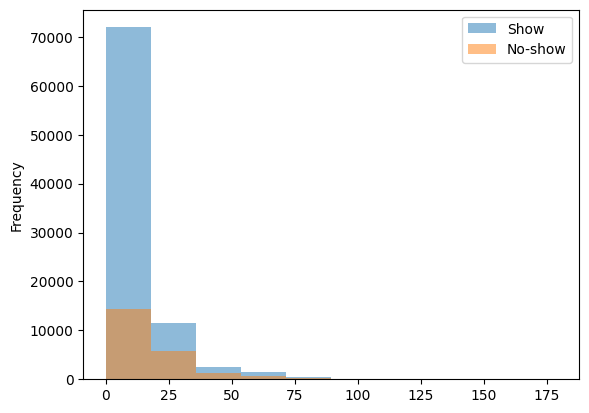

In [46]:
fig, ax = plt.subplots()
df_show['diff_days'].plot(kind='hist', ax=ax, label='Show', alpha=0.5)
df_no_show['diff_days'].plot(kind='hist', ax=ax, label='No-show', alpha=0.5)
plt.legend()
plt.show()

The distribution of the waiting time in days shows that the majority of the patients have a waiting time of 0 days. This might be because the appointment day is the same as the scheduled day.
Let's check the averages.


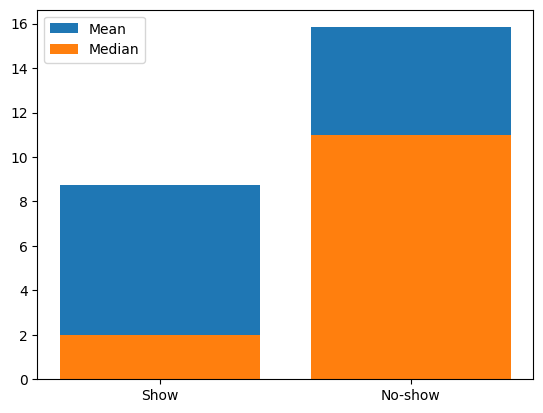

In [47]:
_, ax = plt.subplots()
ax.bar(['Show', 'No-show'], [df_show['diff_days'].mean(),
       df_no_show['diff_days'].mean()], label='Mean')
ax.bar(['Show', 'No-show'], [df_show['diff_days'].median(),
       df_no_show['diff_days'].median()], label='Median')
ax.legend()
plt.show()

Both mean and median are higher for the patients who did not show up. This means that the patients who did not show up have a higher waiting time on average.

### What abut time difference if the same day appointments are excluded?

Let's exclude the same day appointments and see the distribution of the waiting time in days for the patients who showed up and who did not show up.

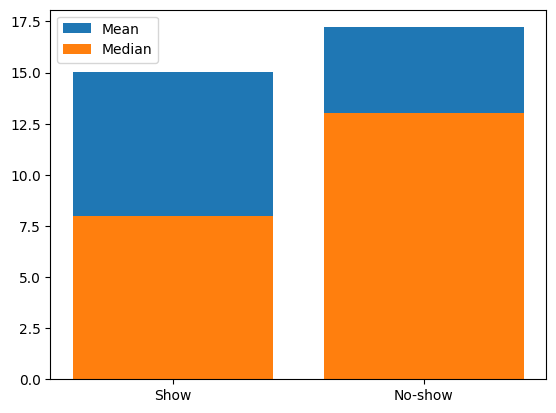

In [48]:
# Remove rows where diff in days is 0
df_show_xsameday = df_show[df_show['diff_days'] > 0]
df_no_show_xsameday = df_no_show[df_no_show['diff_days'] > 0]

_, ax = plt.subplots()
ax.bar(['Show', 'No-show'], [df_show_xsameday['diff_days'].mean(),
       df_no_show_xsameday['diff_days'].mean()], label='Mean')
ax.bar(['Show', 'No-show'], [df_show_xsameday['diff_days'].median(),
       df_no_show_xsameday['diff_days'].median()], label='Median')
ax.legend()
plt.show()


When the same day appointments are excluded, the mean and median are still higher for the patients who did not show up. But the difference is smaller compared to the previous case.

### Gender and no-show: Is there a significant difference in the no-show rate between males and females?

In [49]:
gender_show = df_show.groupby('Gender')['show'].value_counts()
gender_noshow = df_no_show.groupby('Gender')['show'].value_counts()

print(gender_show)
print(gender_noshow)


Gender  show
F       True    57162
M       True    30887
Name: show, dtype: int64
Gender  show 
F       False    14565
M       False     7708
Name: show, dtype: int64


Comparing the no-show rate between the show it shows that proportionally gender does not have a significant effect on the no-show rate. It shows that there are twice as many female patients compared to male patients.

### Does the scholarship have an effect on the no-show?


Present the percentage of patients who have a scholarship for the show and no-show dataframes.

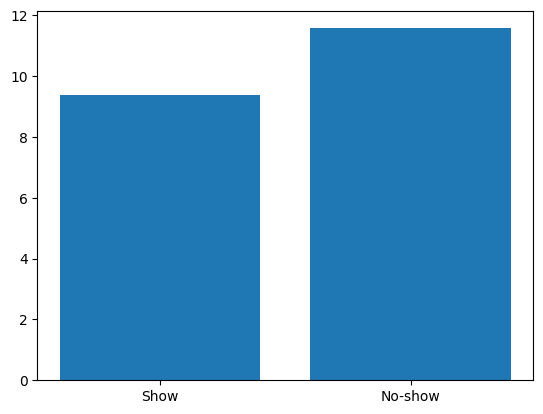

In [50]:
def normalize(df, column_name):
    return df[column_name].value_counts(normalize=True) * 100
 
show_scholarships = normalize(df_show, 'Scholarship')
no_show_scholarships = normalize(df_no_show, 'Scholarship')
_, ax = plt.subplots()
ax.bar(['Show', 'No-show'], [show_scholarships[1], no_show_scholarships[1]])
plt.show()

In Conclusion, the percentage of patients who have a scholarship is similar for both the show and no-show dataframes. This means that the scholarship does not have a significant effect on the no-show rate.

### Does the SMS_received have an effect on the no-show?

Let's plot the percentage of patients who received an SMS for the show and no-show dataframes

0    70.857136
1    29.142864
Name: SMS_received, dtype: float64
0    56.112782
1    43.887218
Name: SMS_received, dtype: float64


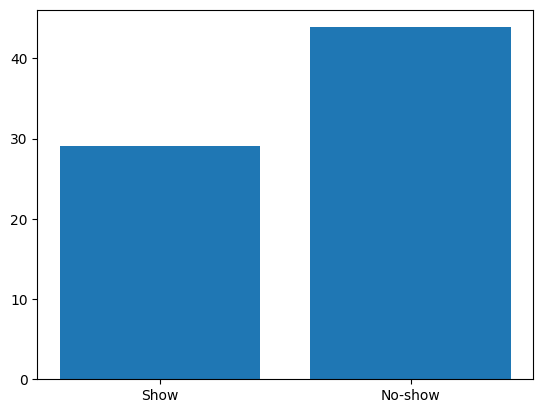

In [51]:
show_sms_received = normalize(df_show, 'SMS_received')
no_show_sms_received = normalize(df_no_show, 'SMS_received')

print(show_sms_received)
print(no_show_sms_received)

# Propotion of patients who received an SMS for the show and no-show dataframes
fig, ax = plt.subplots()
ax.bar(['Show', 'No-show'], [show_sms_received[1], no_show_sms_received[1]])
plt.show()

Comparing the percentage of patients who received an SMS for the show and no-show dataframes, it is clear that the percentage of patients who received an SMS is higher for the patients who did not show up. This is counterintuitive and might be because the patients who did not show up were more likely to receive an SMS.

###  Does the diagnoses have an effect on the no-show?

Going to add a column if the patient has any of the diagnoses. Then plot the percentage of patients who have any of the diagnoses for the show and no-show dataframes.


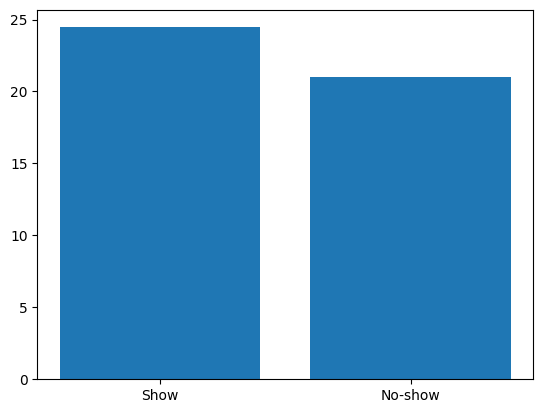

In [52]:
df_apptm['diagnoses'] = df_apptm[['Hypertension',
                                  'Diabetes', 'Alcoholism', 'Handcap']].sum(axis=1)

df_apptm['has_diagnoses'] = df_apptm['diagnoses'] > 0

df_show = df_apptm[df_apptm['show']]
df_no_show = df_apptm.query('show == False')

show_diagnoses = normalize(df_show, 'has_diagnoses')
no_show_diagnoses = normalize(df_no_show, 'has_diagnoses')

fig, ax = plt.subplots()
ax.bar(['Show', 'No-show'], [show_diagnoses[True], no_show_diagnoses[True]])
plt.show()

Conclusions: The percentage of patients who have any of the diagnoses is higher for the patients who did not show up. But no significant difference between the patients who have any of the diagnoses and the patients who do not have any of the diagnoses.

### Does the age and gender have an effect on the no-show?

Lets plot the distribution of the age for the show and no-show dataframes

In [53]:
# df_no_show.groupby(['Age', 'Gender'])['show'].value_counts().sort_index().plot()
print(df_no_show.groupby(['Age', 'Gender'])['show'].value_counts())
print(df_show.groupby(['Age', 'Gender'])['show'].value_counts())

Age  Gender  show 
0    F       False    319
     M       False    320
1    F       False    202
     M       False    213
2    F       False    111
                     ... 
96   F       False      1
97   F       False      1
     M       False      1
98   F       False      1
115  F       False      3
Name: show, Length: 197, dtype: int64
Age  Gender  show
0    F       True    1402
     M       True    1498
1    F       True     886
     M       True     972
2    F       True     646
                     ... 
99   F       True       1
100  F       True       2
     M       True       2
102  F       True       2
115  F       True       2
Name: show, Length: 203, dtype: int64


The distribution of the age for the show and no-show dataframes shows that the age distribution is similar for the patients who showed up and who did not show up. This means that the age does not have a significant effect on the no-show.

### Does the weekday of the appointment have an effect on the no-show?

Let's plot the weekday distribution of the no-shows and shows
let's make the no-sho appear red
let's order the weekdays based on the weekdays order

<AxesSubplot: >

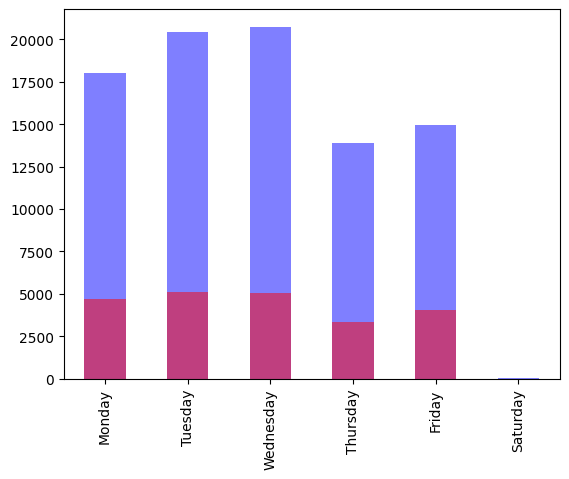

In [56]:
df_show['appointment_weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).plot(kind='bar', color='blue', alpha=0.5)
df_no_show['appointment_weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).plot(kind='bar', color='red', alpha=0.5)

The visit count is similar for all the weekdays. This means that the weekday does not have a significant effect on the no-show.

<a id='conclusions'></a>

## Conclusions

Arriving to the conclusions was done by answering the questions that were asked in the beginning of the analysis.
Data was explored and cleaned before the analysis.
Descriptive statistics and visualizations were used to answer the questions.

### Limitations:

- The dataset only covers a specific time period, which limits the scope of our analysis to that timeframe.
- The data is collected from a limited number of hospitals, which may not represent all hospitals.

### Findings:

- Approximately 20% of patients did not show up for their appointments. This is a significant proportion and efforts to reduce this could lead to substantial savings in time and resources for the hospital.
- Patients who did not show up had a higher average waiting time. This trend persists even when same-day appointments are excluded, although the difference is less pronounced.
- There is no significant correlation between the patient’s gender and the no-show rate.
- Having a scholarship does not significantly affect the no-show rate.
- A higher percentage of patients who did not show up had received an SMS.
- Patients with any diagnoses had a higher no-show rate, but the difference is not significant when compared to patients without any diagnoses.
- The age distribution is similar for both patients who showed up and those who did not, suggesting that age does not significantly affect the no-show rate.
- The day of the week does not significantly affect the no-show rate.

### Recommendations for Future Research:

- Further research could be conducted over a longer time period or across more hospitals to provide a more comprehensive analysis.
- Additional information, such as the distance between the patient’s home and the hospital or the patient’s employment status, could be useful in further understanding the factors influencing the no-show rate.
